In [32]:
## Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 1. Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas. 

In [22]:
## Mount google drive
from google.colab import drive
drive.mount('/content/drive')

## Read in dataframes
title_akas = pd.read_csv('/content/drive/MyDrive/DSI/title.akas.tsv.gz',sep='\t')
title_basics = pd.read_csv('/content/drive/MyDrive/DSI/title.basics.tsv.gz',sep='\t')
title_ratings = pd.read_csv('/content/drive/MyDrive/DSI/title.ratings.tsv.gz',sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2. Drop duplicates in all the dataframes, if there are any. 

In [23]:
## check data frames info

print("title akas has {} duplicate rows".format(title_akas.duplicated().sum()))
print("title basics has {} duplicate rows".format(title_basics.duplicated().sum()))
print("title ratings has {} duplicate rows".format(title_ratings.duplicated().sum()))

title akas has 0 duplicate rows
title basics has 0 duplicate rows
title ratings has 0 duplicate rows


####3. Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe. 

In [24]:
## Merge dataframes
combined_data_outer = title_akas.merge(title_basics,left_on='titleId', right_on='tconst',how='outer').merge(title_ratings,left_on='tconst', right_on='tconst',how='outer')
combined_data_inner = title_akas.merge(title_basics,left_on='titleId', right_on='tconst',how='inner').merge(title_ratings,left_on='tconst', right_on='tconst',how='inner')


#### 3.1 How many lines does the resulting dataframe have if you use an inner merge or outer merge? Make sure you understand the difference. 


In [25]:
print('Outer merge returns {} rows.'.format(combined_data_outer.shape[0]))
print('Inner merge returns {} rows'.format(combined_data_inner.shape[0]))

Outer merge returns 6740089 rows.
Inner merge returns 1686547 rows


#### 3.2 Using the unique() method, compute how many different 'titleTypes' there are 

In [26]:
print(combined_data_outer.titleType.unique())
print(combined_data_outer.titleType.nunique())

['short' 'movie' nan 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort'
 'tvMiniSeries' 'tvSpecial' 'video' 'videoGame']
10


There are 10 title types.

#### 4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new.



In [27]:
df_new = combined_data_outer[((combined_data_outer['language']== 'en' )|(combined_data_outer['region']=='US')) & (combined_data_outer['titleType']=='movie')]
print(df_new.shape)

(263035, 19)


#### 5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column. 

In [28]:
df_new['log10Votes'] = np.log10(df_new['numVotes'])

#### 6. Lower the case of all text in the 'genres' column.

In [29]:
df_new['genres'] = df_new['genres'].str.lower()


#### 6. Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:

#### 6.1 mean number of log10Votes

In [30]:
## Group by genre
## Order df by log10Votes
df_new.groupby(["genres"])["log10Votes"].mean().nlargest(10).reset_index()

,genres,log10Votes
0,"action,fantasy,war",5.405722
1,"action,family,romance",4.801753
2,"animation,drama,war",4.396304
3,"family,music,musical",4.396252
4,"documentary,sport,thriller",4.386731
5,"action,adventure,sci-fi",4.373261
6,"horror,musical,sci-fi",4.340484
7,"biography,fantasy,horror",4.271842
8,"adventure,sci-fi,thriller",4.180897
9,"adventure,drama,sci-fi",4.123983


 #### 6.2 mean averageRating

In [31]:
df_new.groupby(["genres"])["averageRating"].mean().nlargest(10).reset_index()

,genres,averageRating
0,"documentary,history,western",9.300000
1,"history,sport",9.200000
2,"documentary,news,reality-tv",8.800000
3,"animation,crime,documentary",8.525000
4,"biography,history,music",8.500000
5,"adventure,documentary,western",8.433333
6,"documentary,drama,thriller",8.433333
7,"comedy,mystery,sport",8.400000
8,"action,documentary,fantasy",8.300000
9,"biography,documentary,talk-show",8.300000


#### 7. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 

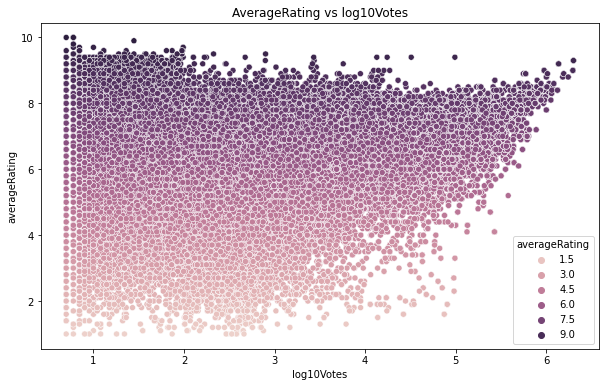

In [38]:
plt.figure(figsize=(10,6))
plt.title('AverageRating vs log10Votes')
sns.scatterplot(data=df_new, x="log10Votes", y="averageRating",hue='averageRating')